In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats

from plotting import init_plot

In [2]:
use_liberation_fonts = True
if use_liberation_fonts:
    plt.rcParams.update({
        'font.family':'sans-serif',
        'font.sans-serif':['Liberation Sans'],
    })

In [3]:
# import 1st flow rate chart
data = pd.read_csv('../data/Virtaama_Alaköngäs_20230101_20231231_v2.csv', delimiter=';')

In [4]:
data

,Aika,Arvo
0,1.1.2023,64.83
1,2.1.2023,64.87
2,3.1.2023,64.13
3,4.1.2023,63.62
4,5.1.2023,63.12
...,...,...
347,27.12.2023,368.28
348,28.12.2023,365.34
349,29.12.2023,364.73
350,30.12.2023,364.66


In [5]:
data["Aika"] = pd.to_datetime(data["Aika"], format="mixed", dayfirst=True)
data = data.set_index("Aika")

Text(0, 0.5, 'Discharge $m^3$/s')

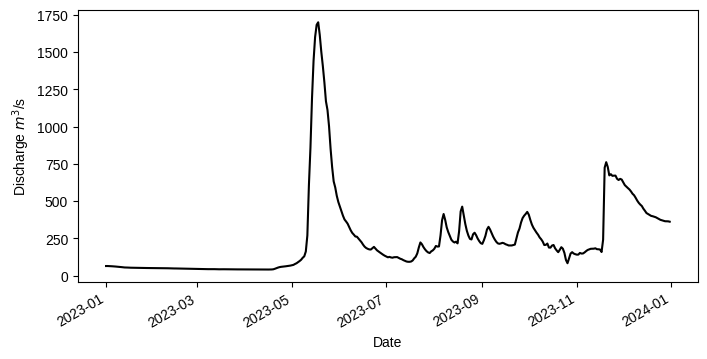

In [15]:

fig, ax = init_plot()
data.plot(color = 'black', linestyle="solid", ax=ax, legend=False)
ax.set_xlabel("Date")
ax.set_ylabel("Discharge $m^3$/s")

Text(0, 0.5, 'Discharge m^3/s')

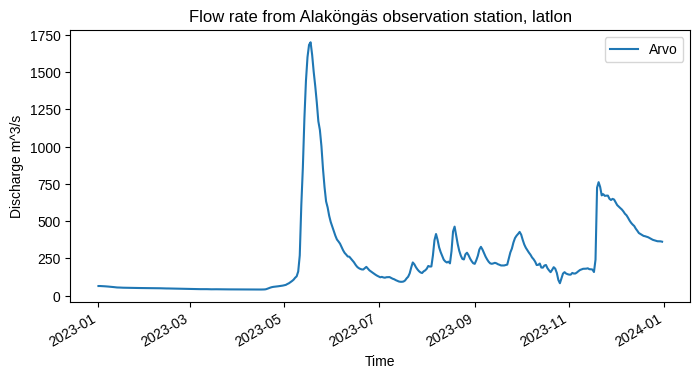

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Flow rate from Alaköngäs observation station, latlon')

data.plot(ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Discharge m^3/s")